In [1]:
%pip install chromospyce -q
%pip install pyBigWig -q
import pyBigWig
import chromospyce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


248956422


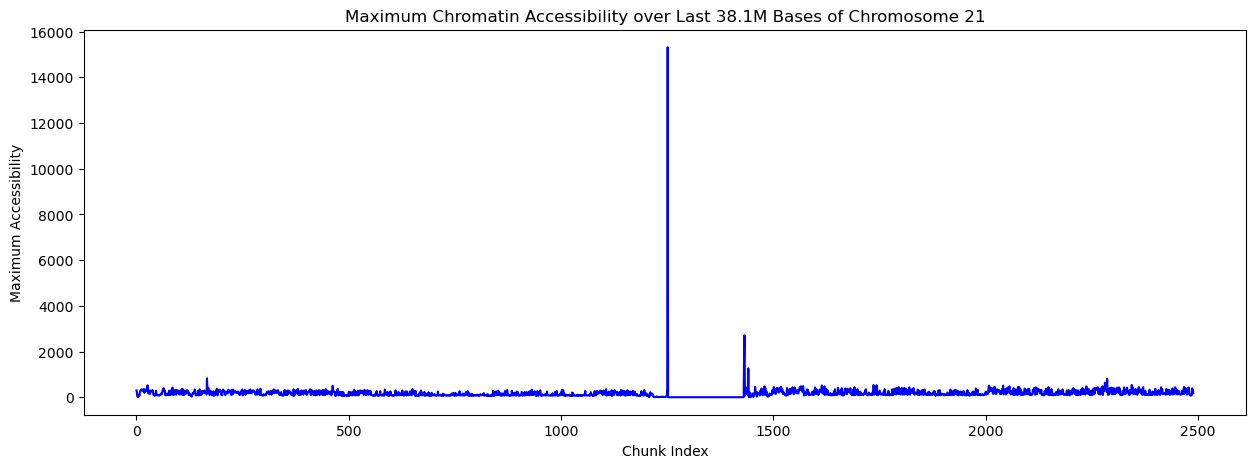

248300000
2484
15319.8
0.0
2490
2479


Widget(structure=b'\xff\xff\xff\xffx\x03\x00\x00\x10\x00\x00\x00\x00\x00\n\x00\x0e\x00\x06\x00\x05\x00\x08\x00…

In [4]:
#ChIP-seq
bw_chip = pyBigWig.open("chip-seq/CHIP.bw")


chrom = "1"
start = 0
end = bw_chip.chroms(chrom)


values_chip = bw_chip.values(chrom, start, end, numpy=True)

bw_chip.close()

print(end)

chunk_size = 100000
max_chip = []
for i in range(0, len(values_chip), chunk_size):
    chunk = values_chip[i:i + chunk_size]
    max = np.nanmax(chunk)
    max_chip.append(max)


max_chip_array = np.array(max_chip)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(np.arange(len(max_chip_array)), max_chip_array, color='blue')
ax.set_xlabel('Chunk Index')
ax.set_ylabel('Maximum Accessibility')
ax.set_title('Maximum Chromatin Accessibility over Last 38.1M Bases of Chromosome 21')
plt.show()

data = pd.read_parquet('Tan3D.parquet', engine='pyarrow')

chrom21_mat = data[(data['chr']== '1(pat)')]
chrom21_mat_coords1 = chrom21_mat[["x", "y", "z"]].to_numpy()
chrom21_mat_coords = chrom21_mat[["coord"]].to_numpy()

print(np.max(chrom21_mat_coords) - np.min(chrom21_mat_coords))
print(len(chrom21_mat_coords))

chrom21_mat.reset_index(drop=True, inplace=True)
print(np.nanmax(max_chip_array))
print(np.nanmin(max_chip_array))


color_values = max_chip_array.tolist()
chrom21_mat_coords1 = chrom21_mat_coords1[:-5]
print(len(color_values))
print(len(chrom21_mat_coords1))

vc = {
    "color": {
        "values": color_values,
        "min": np.nanmin(max_chip_array),
        "max": np.nanmax(max_chip_array),
        "colorScale": "YlOrRd"  # Red to yellow to purple (so red and purple are the extreme values)
    },
    "scale": 0.01,
    "links": True,
    "mark": "sphere"
}

chromospyce.Widget(chrom21_mat_coords1, vc)



133275309


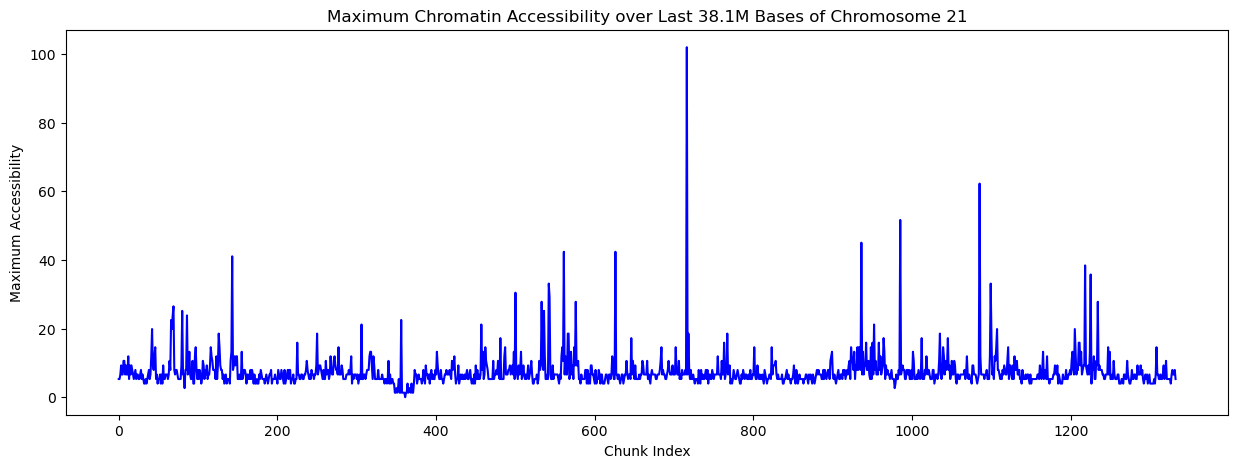

133700000
1338
101.947998046875
0.0
1333
1333


Widget(structure=b'\xff\xff\xff\xffx\x03\x00\x00\x10\x00\x00\x00\x00\x00\n\x00\x0e\x00\x06\x00\x05\x00\x08\x00…

In [8]:
#ChIP-seq
bw_chip = pyBigWig.open("chip-seq/CHIPLymph.bw")


chrom = "12"
start = 0
end = bw_chip.chroms(chrom)


values_chip = bw_chip.values(chrom, start, end, numpy=True)

bw_chip.close()

print(end)

chunk_size = 100000
max_chip = []
for i in range(0, len(values_chip), chunk_size):
    chunk = values_chip[i:i + chunk_size]
    max_value = 0 if np.isnan(chunk).all() else np.nanmax(chunk)
    max_chip.append(max_value)


max_chip_array = np.array(max_chip)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(np.arange(len(max_chip_array)), max_chip_array, color='blue')
ax.set_xlabel('Chunk Index')
ax.set_ylabel('Maximum Accessibility')
ax.set_title('Maximum Chromatin Accessibility over Last 38.1M Bases of Chromosome 21')
plt.show()

data = pd.read_parquet('Tan3D.parquet', engine='pyarrow')

chrom21_mat = data[(data['chr']== '12(pat)')]
chrom21_mat_coords1 = chrom21_mat[["x", "y", "z"]].to_numpy()
chrom21_mat_coords = chrom21_mat[["coord"]].to_numpy()

print(np.max(chrom21_mat_coords) - np.min(chrom21_mat_coords))
print(len(chrom21_mat_coords))

chrom21_mat.reset_index(drop=True, inplace=True)
print(np.nanmax(max_chip_array))
print(np.nanmin(max_chip_array))


color_values = max_chip_array.tolist()
chrom21_mat_coords1 = chrom21_mat_coords1[:-5]
print(len(color_values))
print(len(chrom21_mat_coords1))

vc = {
    "color": {
        "values": color_values,
        "min": np.nanmin(max_chip_array),
        "max": 40,
        "colorScale": "YlOrRd"  # Red to yellow to purple (so red and purple are the extreme values)
    },
    "scale": 0.01,
    "links": True,
    "mark": "sphere"
}

chromospyce.Widget(chrom21_mat_coords1, vc)

